In [1]:
import pandas as pd #load and manipulate data and for one-hot encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb #contains both XGBClassifier and XGBRegressor
import graphviz #graphviz
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer # for scoring during
from sklearn.model_selection import GridSearchCV #cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from xgboost import XGBClassifier
from sklearn. metrics import accuracy_score

In [2]:
#데이터 다운로드
df = pd.read_excel(r'C:\Users\Hon Kim\Desktop\관광통계\2019년_국민여행조사_원자료\dfr.xlsx', index = True) #불필요한 열 삭제
df.drop(['ID'],axis=1,inplace=True)
df.drop(['select_reason_2'],axis=1,inplace=True)
df.drop(['select_reason_3'],axis=1,inplace=True)


#일부 데이터 정수형변환
df['JEJU']=df['JEJU'].astype(int)
df['KYUNG_S']=df['KYUNG_S'].astype(int)
df['KYUNG_N']=df['KYUNG_N'].astype(int)
df['JEON_S']=df['JEON_S'].astype(int)
df['JEON_N']=df['JEON_N'].astype(int)
df['CHOONG_S']=df['CHOONG_S'].astype(int)
df['CHOONG_N']=df['CHOONG_N'].astype(int)
df['GANGWON']=df['GANGWON'].astype(int)
df['KYUNGGI']=df['KYUNGGI'].astype(int)
df['SEJONG']=df['SEJONG'].astype(int)
df['ULSAN']=df['ULSAN'].astype(int)
df['DAEJEON']=df['DAEJEON'].astype(int)
df['GWANGJU']=df['GWANGJU'].astype(int)
df['INCHEON']=df['INCHEON'].astype(int)
df['DAEGU']=df['DAEGU'].astype(int)
df['BUSAN']=df['BUSAN'].astype(int)
df['SEOUL']=df['SEOUL'].astype(int)

#데이터 구성요소확인
df['pre_food'].unique()

#결측치 처리
df=df.fillna(0)

#결측치 처리 확인(multi-hot encoding)
df['pre_food'].unique()


array([0., 2.])

In [3]:
JEJU = pd.DataFrame()
KYUNG_S = pd.DataFrame()
KYUNG_N = pd.DataFrame()
JEON_S = pd.DataFrame()
JEON_N = pd.DataFrame()
CHOONG_S = pd.DataFrame()
CHOONG_N = pd.DataFrame()
GANGWON = pd.DataFrame()
KYUNGGI = pd.DataFrame()
SEJONG = pd.DataFrame()
ULSAN = pd.DataFrame()
DAEJEON = pd.DataFrame()
GWANGJU = pd.DataFrame()
INCHEON = pd.DataFrame()
DAEGU = pd.DataFrame()
BUSAN = pd.DataFrame()
SEOUL = pd.DataFrame()

In [4]:
JEJU = df.loc[df['JEJU']== 1]
KYUNG_S = df.loc[df['KYUNG_S']== 1]
KYUNG_N = df.loc[df['KYUNG_N']== 1]
JEON_S = df.loc[df['JEON_S']== 1]
JEON_N = df.loc[df['JEON_N']== 1]
CHOONG_S = df.loc[df['CHOONG_S']== 1]
CHOONG_N = df.loc[df['CHOONG_N']== 1]
GANGWON = df.loc[df['GANGWON']== 1]
KYUNGGI = df.loc[df['KYUNGGI']== 1]
SEJONG = df.loc[df['SEJONG']== 1]
ULSAN = df.loc[df['ULSAN']== 1]
DAEJEON = df.loc[df['DAEJEON']== 1]
GWANGJU = df.loc[df['GWANGJU']== 1]
INCHEON = df.loc[df['INCHEON']== 1]
DAEGU = df.loc[df['DAEGU']== 1]
BUSAN = df.loc[df['BUSAN']== 1]
SEOUL = df.loc[df['SEOUL']== 1]

In [5]:
seoul = SEOUL['Satify']+SEOUL['revisit']+SEOUL['recommend']
busan = BUSAN['Satify']+BUSAN['revisit']+BUSAN['recommend']
daegu = DAEGU['Satify']+DAEGU['revisit']+DAEGU['recommend']
incheon = INCHEON['Satify']+INCHEON['revisit']+INCHEON['recommend']
gwangju = GWANGJU['Satify']+GWANGJU['revisit']+GWANGJU['recommend']
daejeon = DAEJEON['Satify']+DAEJEON['revisit']+DAEJEON['recommend']
ulsan = ULSAN['Satify']+ULSAN['revisit']+ULSAN['recommend']
sejong = SEJONG['Satify']+SEJONG['revisit']+SEJONG['recommend']
kyunggi = KYUNGGI['Satify']+KYUNGGI['revisit']+KYUNGGI['recommend']
gangwon = GANGWON['Satify']+GANGWON['revisit']+GANGWON['recommend']
choong_n = CHOONG_N['Satify']+CHOONG_N['revisit']+CHOONG_N['recommend']
choong_s = CHOONG_S['Satify']+CHOONG_S['revisit']+CHOONG_S['recommend']
jeon_n = JEON_N['Satify']+JEON_N['revisit']+JEON_N['recommend']
jeon_s = JEON_S['Satify']+JEON_S['revisit']+JEON_S['recommend']
kyung_n = KYUNG_N['Satify']+KYUNG_N['revisit']+KYUNG_N['recommend']
kyung_s = KYUNG_S['Satify']+KYUNG_S['revisit']+KYUNG_S['recommend']
juju = JEJU['Satify']+JEJU['revisit']+JEJU['recommend']

In [6]:
print(seoul.mean())
print(busan.mean())
print(daegu.mean())
print(incheon.mean())
print(gwangju.mean())
print(daejeon.mean())
print(ulsan.mean())
print(sejong.mean())
print(kyunggi.mean())
print(gangwon.mean())
print(choong_n.mean())
print(choong_s.mean())
print(jeon_n.mean())
print(jeon_s.mean())
print(kyung_n.mean())
print(kyung_s.mean())
print(juju.mean())

8.510917030567686
11.225757575757576
9.01063829787234
10.151162790697674
7.901639344262295
8.443661971830986
9.972850678733032
8.978260869565217
10.12996632996633
11.84051329055912
9.457202505219207
10.670305676855895
11.404255319148936
11.39543057996485
10.529411764705882
10.704456606724003
12.206521739130435


In [7]:
seoul.mean()

8.510917030567686

In [8]:
JEJU

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
17,2,1,2,550000.0,1,550000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
34,2,1,1,200000.0,2,100000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
48,2,1,3,400000.0,1,400000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
58,2,1,1,1400000.0,4,350000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9397,1,2,1,500000.0,2,250000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0
10133,1,2,2,890001.0,3,296667.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
10234,1,2,0,120000.0,2,60000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
10270,1,2,2,600000.0,1,600000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,0


In [9]:
df = JEJU

point = df['Satify']+df['revisit']+df['recommend']
point2 = point >= 12
(point2.values==True).sum()

#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
3,3,1,1,120000.0,1,120000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
17,2,1,2,550000.0,1,550000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
34,2,1,1,200000.0,2,100000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
48,2,1,3,400000.0,1,400000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
58,2,1,1,1400000.0,4,350000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [13]:
#훈련용 데이터셋, 시험 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)
#훈련용 데이터셋 타겟변수 분포 확인
sum(y_train)/len(y_train)

0.9178743961352657

In [14]:
#모델링(기준:'mae')
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
           y_train,
           verbose=True,
           early_stopping_rounds=10,
           eval_metric='mae',
           eval_set=[(X_test, y_test)])

[0]	validation_0-mae:0.39814
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:0.32879
[2]	validation_0-mae:0.27852
[3]	validation_0-mae:0.24145
[4]	validation_0-mae:0.21638
[5]	validation_0-mae:0.19556
[6]	validation_0-mae:0.17949
[7]	validation_0-mae:0.16565
[8]	validation_0-mae:0.15479
[9]	validation_0-mae:0.14764
[10]	validation_0-mae:0.13874
[11]	validation_0-mae:0.12991
[12]	validation_0-mae:0.12301
[13]	validation_0-mae:0.11727
[14]	validation_0-mae:0.11258
[15]	validation_0-mae:0.11102
[16]	validation_0-mae:0.10755
[17]	validation_0-mae:0.10590
[18]	validation_0-mae:0.10537
[19]	validation_0-mae:0.10390
[20]	validation_0-mae:0.10051
[21]	validation_0-mae:0.09992
[22]	validation_0-mae:0.09848
[23]	validation_0-mae:0.09824
[24]	validation_0-mae:0.09789
[25]	validation_0-mae:0.09678
[26]	validation_0-mae:0.09426
[27]	validation_0-mae:0.09427
[28]	validation_0-mae:0.09351
[29]	validation_0-mae:0.09324
[30]	validation_0-mae:0.09168
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [15]:
#train 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_train)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_train, predictions)
print("train Accuracy: %.2f%%" % (accuracy * 100.0))

#test 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_test, predictions)
print("test Accuracy: %.2f%%" % (accuracy * 100.0))

train Accuracy: 100.00%
test Accuracy: 94.20%


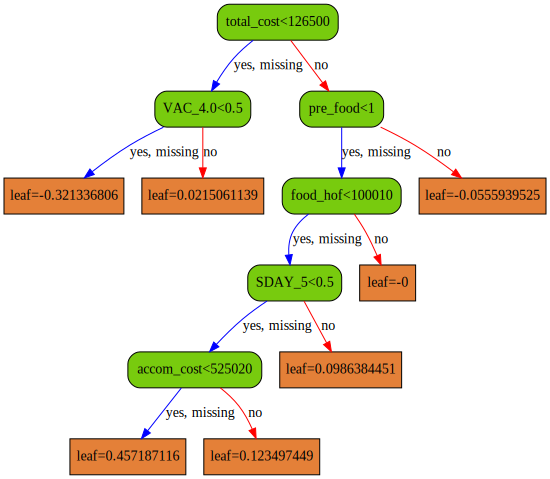

In [16]:
node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params = {'shape' : 'box',
              'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=1, size="10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

In [17]:
df = GWANGJU

point = df['Satify']+df['revisit']+df['recommend']
point2 = point >= 12
(point2.values==True).sum()

#데이터 프레임 상 타겟변수 제거
df.drop(['Satify'],axis=1,inplace=True)
df.drop(['revisit'],axis=1,inplace=True)
df.drop(['recommend'],axis=1,inplace=True)
df.head()

,visit_count,visit_acq,stay,COST,NUM,per_COST,cost_ski_watering,cost_camping,cost_hiking,cost_fishing,...,earn_self_classify_7,BMAR_1,BMAR_2,BMAR_3,BMAR_4,BMAR_5,winter,spring,summer,autumn
115,2,1,1,290000.0,2,145000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,0
351,2,1,0,250000.0,5,50000.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1
353,2,1,3,100000.0,1,100000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
363,2,1,7,300000.0,1,300000.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
391,2,1,2,200000.0,2,100000.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1


In [18]:
#훈련용 데이터셋, 시험 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)
#훈련용 데이터셋 타겟변수 분포 확인
sum(y_train)/len(y_train)

0.5333333333333333

In [19]:
#train 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_train)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_train, predictions)
print("train Accuracy: %.2f%%" % (accuracy * 100.0))

#test 데이터에 대한 예측치 만들기
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
#예측치 평가
accuracy = accuracy_score(y_test, predictions)
print("test Accuracy: %.2f%%" % (accuracy * 100.0))

train Accuracy: 84.44%
test Accuracy: 100.00%


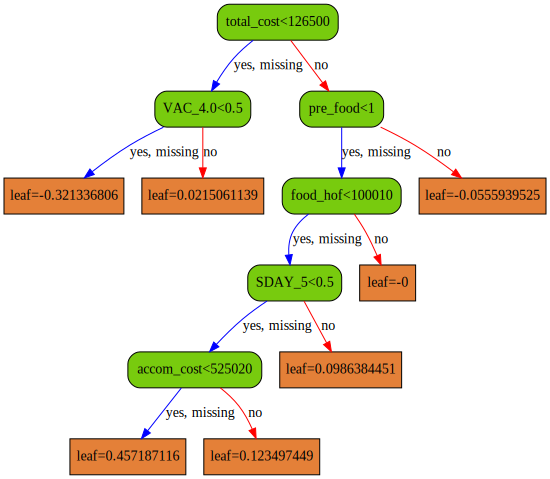

In [20]:
node_params = {'shape': 'box',
              'style': 'filled, rounded',
              'fillcolor': '#78cbe'}
leaf_params = {'shape' : 'box',
              'style': 'filled',
               'fillcolor': '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees=1, size="10,10",
               condition_node_params=node_params,
               leaf_node_params=leaf_params)

In [3]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

In [4]:
#만족도, 재방문률, 추천정도 변수를 합쳐
#타겟변수설정
point = df['Satify']+df['revisit']+df['recommend']

#point2 = point >= 15
#(point2.values==True).sum()

#point2 = point >= 14
#(point2.values==True).sum()

#point2 = point >= 13
#(point2.values==True).sum()

point2 = point >= 12
(point2.values==True).sum()

#point2 = point >= 11
#(point2.values==True).sum()

#point2 = point >= 10
#(point2.values==True).sum()

7852

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import numpy as np

In [8]:
#훈련용 데이터셋, 시험 데이터셋 설정
X_train, X_test, y_train, y_test = train_test_split(df, point2, random_state=42, stratify = point2)
#훈련용 데이터셋 타겟변수 분포 확인
sum(y_train)/len(y_train) 

0.7476196521518345

In [9]:
model = Sequential()

In [10]:
model.add(Dense(64, activation='relu', input_dim=20))

In [11]:
model.add(Dropout(0.5))

In [12]:
model.add(Dense(64,activation='relu'))

In [13]:
model.add(Dropout(0.5))

In [14]:
model.add(Dense(10, activation='softmax'))

In [15]:
sgd = SGD(lr=0.01, decay=1e-6,momentum=0.9, nesterov=True)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [18]:
model.fit(X_train,y_train,epochs=20,batch_size=128)

Epoch 1/20


ValueError: in user code:

    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 20 but received input with shape [None, 338]


In [19]:
score=model.evaluate(X_test,y_test,batch_size=128)

ValueError: in user code:

    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Hon Kim\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 20 but received input with shape [None, 338]


In [20]:
from sklearn.neural_network import MLPRegressor

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
nn=MLPClassifier(hidden_layer_sizes=(10,10,), activation = 'logistic', max_iter=10)

In [26]:
nn.fit(X_train,y_train)

C:\Users\Hon Kim\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10), max_iter=10)

In [27]:
from sklearn import metrics

In [29]:
mae = metrics.mean_absolute_error(point2, nn.predict(df))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.